In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [1]:
from sympy import *

# Foundations

## Random Events & Probability

### Probability of Random Events

#### Classical

##### Set of Exhaustive Events

If $A_i \cap A_j = \emptyset, i \neq j$, and $\cup_{k=1}^n A_k = \Omega$, then the set $\{A_1, A_2, ..., A_n\}$ is a Set of Exhaustive Events.

#### Geometric

### Operations

#### Union

$$p(A\cup B) = p(A) + p(B) -  p(A\cap B)$$

If $A$ and $B$ are incompatible events, then:

$$p(A\cup B) = p(A) + p(B)$$

#### Intersect

#### Except

### Conditional Probability

$$p(A|B) = \frac{p(A,B)}{p(B)}$$

$$p(A_1, A_2, \cdots, A_n) = p(A_1)p(A_2|A_1)p(A_3|A_1,A_2)\cdots p(A_n)p(A_1, A_2,\cdots, A_{n-1})$$

#### Independence

If $p(B|A)=p(B)\lor p(A|B)=p(A)$, then $A$ and $B$ are independent.

Under this circumstance,

$$p(A,B) = p(A)p(B)$$

If there are $n$ independent events $A_i, i=1,2,\cdots, n$, then,
$$p(A_1, A_2, \cdots, A_n) = \prod_{i=1}^np(A_i)$$

#### Conditional Independence

If $p(A|B,C)=p(A|C)$, then $A$ and $B$ are conditionally independent regarding event $C$, articulated as:

$$A\perp B|C$$

$$p(A,B|C) = p(A|B,C)p(B|C) = p(B|A,C)p(A|C) = p(A|C)p(B|C)$$

### Causal Reasoning

#### Law of Total Probability (Cause $\rightarrow$ Effect)

If the set $\{C_1, C_2, ..., C_n\}$ is a Set of Exhaustive Events, and $p(C_i)>0$, then $\forall E$,

$$p(E) = \sum_{i=1}^np(C_i)p(E|C_i)$$

#### Bayes' Theorem (Cause $\leftarrow$ Effect)

$$p(C|E) = \frac{p(C)p(E|C)}{p(E)}$$

If the set $C = \{C_1, C_2, ..., C_n\}$ is a Set of Exhaustive Events, and $p(C_i)>0,p(E)>0$, then for the $\xi$-th event $C_{\xi}$,

$$p(C_{\xi}|E) = \frac{p(C_{\xi})p(E|C_{\xi})}{p(E)} = \frac{p(C_{\xi})p(E|C_{\xi})}{\sum_{i=1}^np(C_i)p(E|C_i)}$$

If event $C$ is Cause, $E$ is Effect, then $p(C)$ is called Prior Probability (先验概率) (已提前知晓原因的值), $p(C|E)$ called Posterior Probability (后验概率)（得到结果后才知道原因）, $p(E|C)$ called Likelihood Function.

# Distributions

Probability Mass Function (PMF): $p(x_i)$ (for discrete variables) / Probability Density Function (PDF): $f(x)$ (for continuous variables).

Cumulative Distribution Function (CDF):

$$F_X(x) = p(X \leq x) = \begin{cases}\sum_{X_i\leq x}p(X = X_i) & X\text{ is discrete}\\ \int_{-\infty}^{x}f(t)\text{d}t & X\text{ is continuous}\end{cases}$$

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\textbf{Distribution} & \textbf{PMF (Dis) / PDF (Con)} & \textbf{CDF} & \textbf{E}\boldsymbol{(X)} & \textbf{Var}\boldsymbol{(X)}&\boldsymbol{\mu'_k}\\
\hline
\textbf{Bernoulli (0-1): } X\sim B(p) & p(X = x) = p^x(1-p)^{1-x}, x\in \{0,1\} & & p & p(1-p) \\ 
\textbf{Binominal: } X \sim B(n,p)\ & p(X = k)=\binom{n}{k}p^k(1-p)^{n-k},k\in \mathbb{N} &  & np & np(1-p)\\
\textbf{Multi-nominal}\\
\hline
\textbf{Geometric: } X \sim G(P) & p(X=k) =(1-p)^{k-1}p, k\in\mathbb{N}^+& F(k) = 1-(1-p)^k & \frac{1}{p} & \frac{1-p}{p^2} \\
\textbf{Hyper-geometric:} \\
\hline
\textbf{Uniform: } X \sim U(a,b) & f(x)=\begin{cases}\frac{1}{b-a} & ,a\leq x\leq b\\0 & ,\text{other}\end{cases} & F(x) = \begin{cases}0 & ,x<a \\ \frac{x-a}{b-a} & ,a\leq x < b \\1 & ,b\leq x\end{cases}& \frac{a+b}{2} & \frac{(b-a)^2}{12}\\
\hline
\textbf{Poisson: } X \sim P(\lambda) & P(X = k)=\frac{\lambda^k}{k!}e^{-\lambda},k\in \mathbb{N}\text{ and }\lambda>0 & & \lambda & \lambda\\
\hline
\textbf{Exponential: } X \sim E(\lambda) & f(x) = \begin{cases}\lambda e^{-\lambda x} & ,x>0 \\ 0 & ,x\leq 0 \end{cases}, \lambda>0 & F(x) = \begin{cases}1-e^{-\lambda x} & ,x>0 \\ 0 & ,x\leq 0 \end{cases}, \lambda>0 & \frac{1}{\lambda} & \frac{1}{\lambda^2} & \frac{k!}{\lambda^k}\\
\hline
\textbf{Normal: } X \sim N(\mu,\sigma^2) & f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}},x \in \mathbb{R} & F(x) = \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^xe^{-\frac{(t-\mu)^2}{2\sigma^2}}\text{d}t & \mu & \sigma^2 & \begin{cases}1\times3\times5\times\cdots\times(k-1)\sigma^k &\text{, if } k \text{ is even} \\ 0 &\text{, if } k \text{ is odd}\end{cases}\\
\text{Standard: } X \sim N(0,1) & \phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, x \in \mathbb{R} & \Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^xe^{-\frac{t^2}{2}}\text{d}t & 0 & 1 \\
\hline
\textbf{Standard Logistic} & f(x) = \frac{e^{-x}}{(1+e^{-x})^2}& F(x) = \frac{1}{1+e^{-x}} & 0 & \frac{\pi^2}{3}\\
\hline
\textbf{Chi-square: } \chi^2 \sim \chi^2(\nu) & & & \nu & 2\nu\\
\hline
\boldsymbol{t:} T\sim t(\nu)\\
\hline
\boldsymbol{F:} F\sim F(n_1,n_2)\\
\hline
\end{array}
$$

## Random Variable Distribution

## Sampling Distribution

### $\chi^2$ Distribution: $X\sim\chi^2(\nu)$ or $\chi^2\sim\chi^2(\nu)$

#### Definition

For $X_1, X_2, \cdots, X_\nu$, if (i) $X_i, X_j, i \neq j$ are independent, (ii) $X_1, X_2, \cdots, X_\nu \sim N(0,1)$, and (iii) $\chi^2 = \sum_{i=1}^\nu X_i^2$, then:

$$X=\chi^2\sim \chi^2(\nu)$$

where $\nu$ denotes the Degree of Freedom.

#### Properties

### $t$ Distribution

For two independent random varibles $X$ with $X\sim N(0,1)$ and $Y$ with $Y\sim \chi^2(\nu)$, then:

$$T=\frac{X}{\sqrt{Y/n}}\sim t(\nu)$$

### $F$ Distribution

For two indenpendent random variables $X$ with $X\sim\chi^2(\nu_1)$ and $Y$ with $Y \sim \chi^2(\nu_2)$, then:

$$F=\frac{X/\nu_1}{Y/\nu_2} ~ F(\nu_1, \nu_2)$$

where $\nu_1$ and $\nu_2$ denote First DF and Second DF.

### Sampling Distribution of Gaussian Population

#### One Gaussian Population

Assume a population $X \sim N(\mu, \sigma^2)$

(i) $\bar{X}\sim N(\mu, \frac{\sigma^2}{n}), Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$

(ii) $\bar{X}$ and $S^2$ are mutually independent, and $\chi^2 = \frac{(n-1)S^2}{\sigma^2}\sim\chi^2(n-1)$

## Distribution Transformation

For $X$, $Y$ and $Y=g(X)$, if g(X) is strictly monotonic and $\exists g^{-1}(x) = h(x)$, then:

$$F_Y(y) = F_X(h(y))$$

$$f_Y(y) = f_X(h(y))|h'(y)|$$

### Inverse Transform Sampling

$$h(y) = F_X^{-1}(F_Y(y))$$

# Random Variables

## General

### Expectation & Variance (Omitted)

### Moment

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Ordinal } \boldsymbol{k} & \textbf{Raw }\boldsymbol{\mu'_{k}} & \textbf{Central }\boldsymbol{\mu_k} & \textbf{Standardised } \boldsymbol{\hat{\mu}_k} \\
\hline
1 & \text{Mean} & 0 & 0 \\
\hline
2 & - & \text{Variance} & 1 \\
\hline
3 & - & - & \text{Skewness} \\
\hline
4 & - & - & \text{Kurtosis} \\
\hline
\end{array}
$$

#### Raw Moment （原点矩）

$$\mu'_k = \text{E}(X^k) = \begin{cases} \sum_{i=1}^{n}x_i^kp(x_i)&\text{, if discrete} \\ \int_{-\infty}^{+\infty}x^kf(x)\text{d}x& \text{, if continuous} \end{cases}$$

#### Central Moment （中心矩）

$$\mu_k = \text{E}\{[X-\text{E}(X)]^k\} = \begin{cases} \sum_{i=1}^{n}(x_i-\mu)^kp(x_i)&\text{, if discrete} \\ \int_{-\infty}^{+\infty}(x-\mu)^kf(x)\text{d}x& \text{, if continuous} \end{cases}$$

$\textbf{Note: }$

$\mu_2 = \mu'_2 - {\mu'_1}^2 = \text{E}(X^2) - [\text{E}(X)]^2$

$\mu_3 = \mu'_3 - 3\mu'_2\mu'_1 + 2{\mu'_1}^3$

$\mu_4 = \mu'_4 - 4\mu'_3\mu'_1 + 6\mu'_2{\mu'_1}^2 - 3{\mu'_1}^4$

#### Standardised Moment

$$\hat{\mu}_k = \frac{\mu_k}{\sigma^k}$$

### Jensen's Inequality

### Probability Distribution of Random Variables

#### Binominal Distribution

#### Normal Distribution

$F(\mu-\sigma \leq x \leq \mu+\sigma) \approx 68.27\%$

$F(\mu-2\sigma \leq x \leq \mu+2\sigma) \approx 95.45\%$

$F(\mu-3\sigma \leq x \leq \mu+3\sigma) \approx 99.73\%$

## Random Vector

### Discrete & Continuous Random Vectors

$\cov$

### Expectation

### Covariance

$$\text{Cov}(X,Y)=E[(X-E(X))(Y-E(Y))]$$

#### Concepts

##### Correlation Coefficient

$$\rho_{XY} = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)}\sqrt{\text{Var}(Y)}}$$

#### Properties

$\text{Cov}(X,Y) = E(XY) - E(X)E(Y)$

$\text{Var}(X\pm Y) = \text{Var}(X)+\text{Var}(Y)\pm2\text{Cov}(X,Y)$

$\text{Cov}(aX, bY) = ab\text{Cov}(X,Y)$

$\text{Cov}(X_1+X_2, Y) = \text{Cov}(X_1, Y) + \text{Cov}(X_2, Y)$

## Important Theorems

### Law of Large Numbers

#### Chebyshev Inequality

$$P\{|X-\mu|\geq \epsilon\} \leq \frac{\sigma}{\epsilon^2}$$

or

$$P\{|X-\mu| \geq k\sigma\} \leq \frac{1}{k^2}$$

#### Kintchine Inequality

$$\lim_{n \rightarrow +\infty} P\{|\frac{1}{n}\sum_{i=1}^nX_i-\mu|<\epsilon\} = 1$$

### Central Limit Theorem

#### De Moivre–Laplace theorem

$$\lim_{n\rightarrow+\infty}P\{\frac{X_n-np}{\sqrt{np(1-p)}}\leq x\}=\Phi(x)$$

Under this circumstance, in order to find $P\{X \leq X'\}$, we calculate:

$$P\{\frac{X - E(X)}{\text{SD}(X)}\leq\frac{X' - E(X)}{\text{SD}(X)}\} = \Phi(\frac{X' - E(X)}{\text{SD}(X)})$$

#### Lindeberg-Lévy form

$$\lim_{n\rightarrow+\infty}P\{\frac{\sum_{i=1}^nX_i-n\mu}{\sqrt{n}\sigma}\leq x\}=\Phi(x)$$

In [13]:
norm.cdf(1.667, 0, 1)

0.952242797563695

# Descriptive Statistics

In [60]:
# Sample data
graduates_scores = pd.read_csv('/Users/jianxiang/Research/Programming/Statistics/data/descriptive/graduates_scores.csv')

## Data Level

### Mean

In [ ]:
# Simple Mean
pd.DataFrame.mean()

In [ ]:
# Weighted Mean
np.average(a = ___, weights = ___)

### Quantile

In [ ]:
# Median (<=>50% Quartile <=> 50% Percentile)
pd.DataFrame.median()

Qaurtile (Linear Interpolation):

$$\text{loc}(Q_{25\%})=\frac{n+3}{4}$$
$$\text{loc}(Q_{75\%})=\frac{3n+1}{4}$$

In [ ]:
# Quartile (<=> 25%/75% Percentile)
pd.DataFrame.quantile(pd, q = [0.25, 0.75], interpolation = 'linear')  # 计算25%和75%四分位数，采用线性插值

Percentile (Linear Interpolation):
$$\text{loc}(P_{i\%})=\frac{i}{100}\times(n-1)$$

In [ ]:
# Percentile (General Form)
pd.DataFrame.quantile(pd, q = [0.1, 0.9], interpolation = 'linear')  # 计算10%和90%的百分位数，采用线性插值

### Mode (众数) 

In [ ]:
pd.DataFrame.mode()

## Data Variability

### Range

Range (极差):
$$R = \max(x)-\min(x)$$
\
Interquartile Range (四分位差):
$$\text{IQR}=Q_{75\%}-Q_{25\%}$$
$\text{IQR}$ $\searrow$ $\Rightarrow$ concentration of middle 50% data $\nearrow$.

In [ ]:
# Range
R = pd.DataFrame.max() - R = pd.DataFrame.min()

In [3]:
# Interquartile Range

In [ ]:
IQR = np.quantile(pd, q = 0.75) - np.quantile(pd, q = 0.25)

### Deviation

Population Variance:
$$\sigma^2=\frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}$$
Sample Variance (with Bessel's correction):
$$s^2=\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}$$
\
where $\sigma$ and $s$ are standard deviations.

In [ ]:
# Variance
var = pd.DataFrame.var(ddof = ___) # 'ddof = 0' for Population and ' = 1' for Sample; Default is 1.

In [ ]:
# Standard Deviation
std = pd.DataFrame.std(ddof = ___) # 'ddof = 0' for Population and ' = 1' for Sample; Default is 1.

### Coefficient of Variation (CV)

$$
\text{CV} = 
    \begin{cases}
    \frac{\sigma}{\mu} & \text{if Population} \\
    \frac{s}{\bar{x}} & \text{if Sample}
    \end{cases}
$$
\
Typically, $\text{CV} \nearrow$ $\Rightarrow$ Dispersion $\nearrow$. $\textit{However}$, it should be prudent to interpret the situation when $\lim_{{\mu \lor \bar{x}} \rightarrow 0}\text{CV} = \infty$.

In [ ]:
CV = mean / std

### Standard Score（z-score）

$$
\boldsymbol{z} = 
    \begin{cases}
    \frac{\boldsymbol{X} - \mu}{\sigma} & \text{if Population} \\
    \frac{\boldsymbol{X} - \bar{x}}{\bar{s}} & \text{if Sample}
    \end{cases}
$$

$$
z_i = 
    \begin{cases}
    \frac{x_i - \mu}{\sigma} & \text{if Population} \\
    \frac{x_i - \bar{x}}{\bar{s}} & \text{if Sample}
    \end{cases}
$$

## Shape of Data Distribution

### Coefficient of Skewness

#### Definition & Calculation

$$\text{SK} = \hat{\mu}_3 = \frac{\mu_3}{\sigma_3}$$

If $\text{SK} \rightarrow 0$, then the data distribution is more symmetric. $\text{SK} > 0$表示Positive Skewness（右侧有长尾，波峰向左倾斜）；$\text{SK} < 0$表示Negative Skewness（左侧有长尾，波峰向右倾斜）

Implementation with Pandas:

$$\text{SK}_{\text{pandas}} = \frac{\sqrt{n(n-1)}}{n-2}\text{SK}$$

### Coefficient of Kurtosis

#### Definition & Calculation

##### Historical

$$K = \hat{\mu}_4 = \frac{\mu_4}{\sigma^4}$$

##### Excess Kurtosis

$$\text{EK} = K - K(\text{Normal}) = K - 3$$

$\text{EK} > 0$: 尖峰分布

$\text{EK} < 0$: 扁平分布

##### Excess Kurtosis for Pandas

$$\text{EK}_\text{pandas} = \frac{(n-1)[(n+1)\text{SK}+6]}{(n-2)(n-3)}$$

### Implementation

In [63]:
skew = graduates_scores['Score'].skew()
kurt = graduates_scores['Score'].kurt()

print('Skewness: ', round(skew, 4),'\n'
     'Kurtosis: ', round(kurt, 4))

Skewness:  -0.6632 
Kurtosis:  0.2905


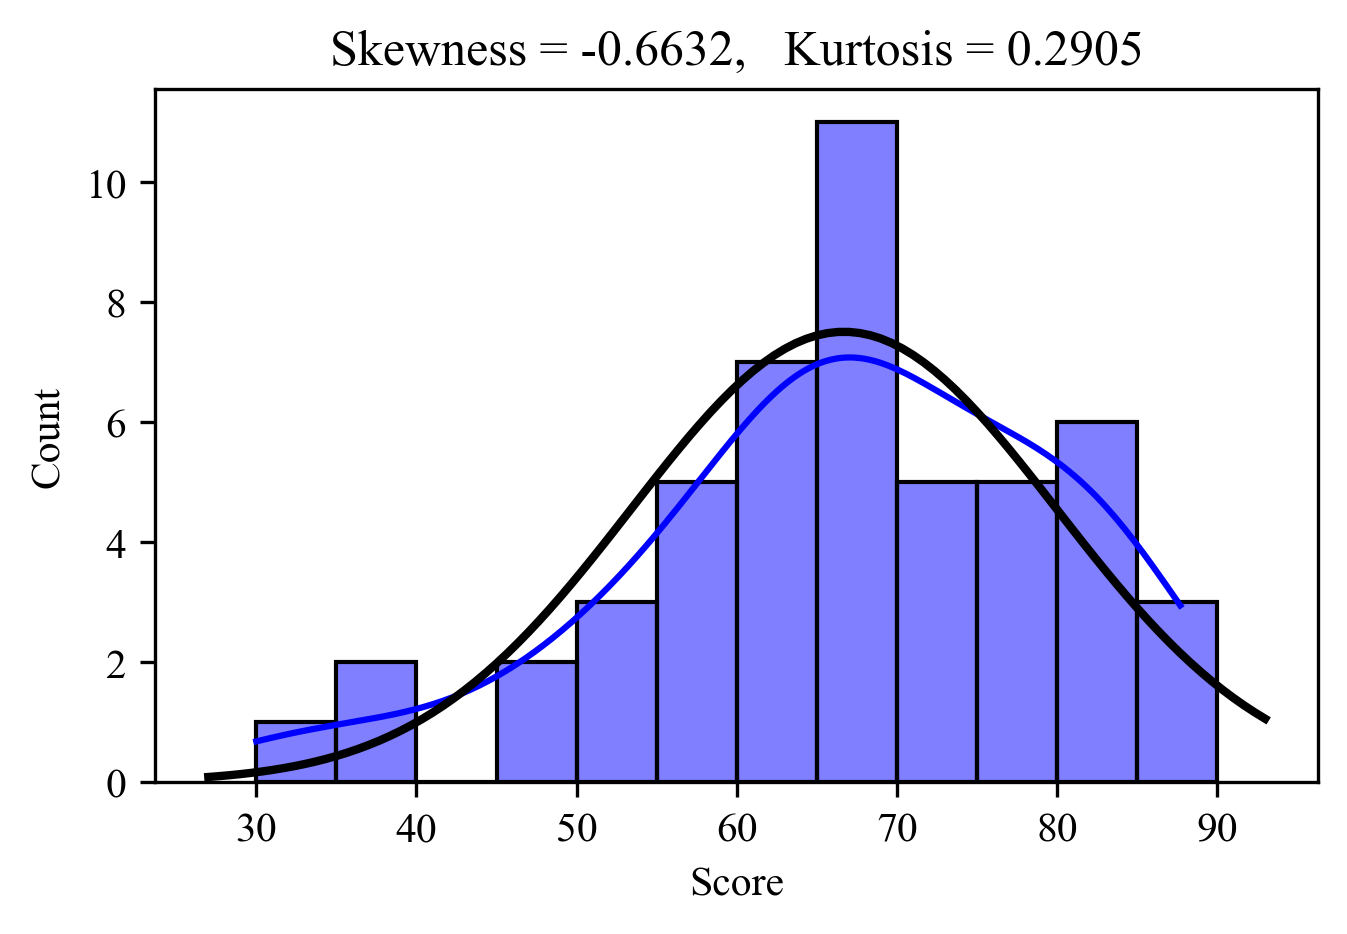

In [107]:
bin_width = 5
bins = np.arange(30, graduates_scores['Score'].max() + bin_width, bin_width)

# 绘制分数的直方图
plt.figure(figsize=(5, 3), dpi = 300)
sns.histplot(graduates_scores['Score'], bins=bins, kde=True, color='blue', stat='count')

# 添加正态分布拟合曲线
mu, std = norm.fit(graduates_scores['Score'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) * 50 * 5
plt.plot(x, p, 'k', linewidth=2)

# 设置图表标题和标签
title = "Skewness = -0.6632,   Kurtosis = 0.2905"
plt.title(title)
plt.xlabel('Score')
plt.ylabel('Count')

# 显示图表
plt.show()

# Parameter Estimation

## Concepts

## Methods of Estimation

### Maximum Likelihood Estimation (MLE)

##### Original

Likelihood Function:

$$\mathcal{L}_\boldsymbol{\theta} = \prod_{i=1}^np(x_i|\boldsymbol{\theta})$$

Parameter(s) to be found:

$$\boldsymbol{\theta} = \arg\max_\boldsymbol{\theta} \mathcal{L}_\boldsymbol{\theta}$$

##### Log-likelihood

Log-likelihood Function:

$$\ln \mathcal{L}_\boldsymbol{\theta} = \sum_{i=1}^n\ln p(x_i|\boldsymbol{\theta})$$

### Maximum A Posteriori (MAP) Estimation

$$p(\boldsymbol{\theta}|\boldsymbol{x}) = \frac{p(\boldsymbol{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\boldsymbol{x})} = \frac{p(\boldsymbol{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int_\boldsymbol{\theta}p(\boldsymbol{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})\text{d}\boldsymbol{\theta}}$$

$$\mathcal{L}_\text{MAP} = \arg\max_\boldsymbol{\theta}\prod_{i=1}^np(\boldsymbol{\theta})p(x_i|\boldsymbol{\theta})$$

## Interval Estimation

### Confidence interval

$$P\{\theta_1 < \theta < \theta_2\} = 1-\alpha$$

# Hypothesis Test

# Categorical Variable Analysis

# Analysis of Variance (ANOVA)

## Principles

### Definition

方差分析是分析类别自变量对数值因变量影响的一种统计方法。自变量对因变量的影响也称为自变量效应 ($\textbf{Effect}$)。

下面的案例数据模拟了《原神》玩家在不同类别下抽取限定5星角色的次数。表格的内容如下：

$\textbf{Factor}$（Player_Type）：这代表玩家的类型，分为三个$\textbf{Level}$——'Unlucky'（非酋）、'Average'（普通玩家）、'Lucky'（欧皇）。

$\textbf{Experiment Unit}$（Pulls_Till_Limited_5_Star）：这表示每个玩家在获得限定5星角色之前需要抽取的次数。

目的：方差分析的目的是为了测试不同类型玩家（非酋、普通玩家、欧皇）在获取限定5星角色方面是否存在统计上显著的差异。具体来说，我们想了解这三种玩家类型是否对抽卡次数有显著影响。

In [3]:
genshin_gacha = pd.read_csv('/Users/jianxiang/Research/Programming/Statistics/data/anova/genshin_impact_gacha_data.csv')
genshin_gacha

,Player_Type,Pulls_Till_Limited_5_Star
0,Unlucky,146
1,Unlucky,126
2,Unlucky,134
3,Unlucky,153
4,Unlucky,148
5,Unlucky,120
6,Unlucky,134
7,Unlucky,120
8,Unlucky,120
9,Unlucky,126


### Error Decomposition

$\text{SST}=\text{SSA}+\text{SSE}$

就上述原神抽卡的案例而言，假设3个玩家在抽取到限定五星角色之前的次数的均值分别为$\mu_1, \mu_2, \mu_3$，分析玩家幸运程度对抽卡次数的影响也就是要检验下面的假设：

$H_0$: $\mu_1=\mu_2=\mu_3$ (Not significant)

$H_1$: $\mu_1, \mu_2, \mu_3$ not ALL equal (Significant)

## One-way ANOVA

### Mathematical Model

设因子A有$I$个Level（例如非酋、普通、欧皇，3个Level），One-way ANOVA可以表示为：

$$
y_{ij} = \mu_i + \epsilon_{ij}
$$

式中, $y_{ij}$为第$i$ ($i\leq I$)个Level中的第$j$个Observation；$\mu_i$为第$i$个Level的平均值；$\epsilon_{ij}$为第i个Level中第$j$个Observation的随机误差。

注：$\epsilon_{ij}$为随机误差，并且通常假定$\epsilon \sim N(0, \sigma^2)$。此外，也通常假定，对于第$i$个Level，$E(y_{ij})=\mu_i$，即各个Prediction都等于对应Level的均值。

设全部Observations的总均值为$\mu$，第$i$个Level的Effect记作$\alpha_i$，则$\alpha_i=\mu_i-\mu$。这样，第$i$个Level的均值被分解成$\mu_i=\mu+\alpha_i$，这样之前的式子可以表示为：

$$y_{ij}=\mu + \alpha_i + \epsilon_{ij}$$

这样一来，要检验玩家幸运程度对抽卡次数是否有显著影响，也就是要检验如下假设：

$H_0$: $\alpha_1=\alpha_2=\alpha_3$ (Not significant)

$H_1$: $\alpha_1, \alpha_2, \alpha_3$ not ALL equal to $0$ (Significant)

### Effect Testing

\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Error Sources} & \textbf{SS} & \textbf{df} & \textbf{Mean Square} & \textbf{Test Statistic } F\\
\hline
\text{Treatment Effect} & \text{SSA}= \sum_{i=1}^{I}n_i(\bar{y_i}-\bar{\bar{y}})^2& I-1 & \text{MSA}=\frac{\text{SSA}}{I-1} & \frac{\text{MSA}}{\text{MSE}} \\ 
\text{Error} & \text{SSE}=\sum_{i=1}^{I}\sum_{j=1}^{n_i}(y_{ij}-\bar{y_i})^2 & n-I & \text{MSE}=\frac{\text{SSE}}{n-I} &\\
\text{Total Effect} & \text{SST} = \sum_{i=1}^{I}\sum_{j=1}^{n_i}(y_{ij}-\bar{\bar{y}})^2 & n-1 & &\\
\hline
\end{array}

where:

$n_i$ is the Sample Size of the $i^{th}$ ($i\leq I$) Level.

$\bar{y_i}=\frac{1}{n_i}\sum_{j=1}^{n_i}y_{ij}$ ($j\leq n_i$) is the sample mean of the $i^{th}$ Level.

$\bar{\bar{y}}=\frac{1}{n}\sum_{i=1}^{I}\sum_{j=1}^{n_i}y_{ij}$ is the Total Mean for all samples.

Implementation:

In [6]:
from statsmodels.formula.api import ols       # 普通最小二乘回归
from statsmodels.stats.anova import anova_lm

In [7]:
one_way_anova = ols(formula='Pulls_Till_Limited_5_Star~Player_Type', data=genshin_gacha).fit()
anova_lm(one_way_anova, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
Player_Type,2.0,26093.6,13046.800000,58.680282,1.482024e-10
Residual,27.0,6003.1,222.337037,NaN,NaN


In [9]:
print(one_way_anova.summary())

                                OLS Regression Results                               
Dep. Variable:     Pulls_Till_Limited_5_Star   R-squared:                       0.813
Model:                                   OLS   Adj. R-squared:                  0.799
Method:                        Least Squares   F-statistic:                     58.68
Date:                       Mon, 01 Jan 2024   Prob (F-statistic):           1.48e-10
Time:                               20:43:05   Log-Likelihood:                -122.05
No. Observations:                         30   AIC:                             250.1
Df Residuals:                             27   BIC:                             254.3
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

注意：此方法强迫$\alpha_1 = 0$，即$\mu = \mu_i$。

In [42]:
mean = one_way_anova.params.values[0]
lci, uci = one_way_anova.conf_int().iloc[0].values
df_mean = pd.DataFrame([lci, mean, uci], index=['lci', 'mean', 'uci'], columns = ['Average'])
df_mean['Lucky'] = df_mean['Average'] + one_way_anova.params.values[1]
df_mean['Unlucky'] = df_mean['Average'] + one_way_anova.params.values[2]

In [49]:
df_mean.T

,lci,mean,uci
Average,84.82508,94.5,104.17492
Lucky,50.82508,60.5,70.17492
Unlucky,123.02508,132.7,142.37492


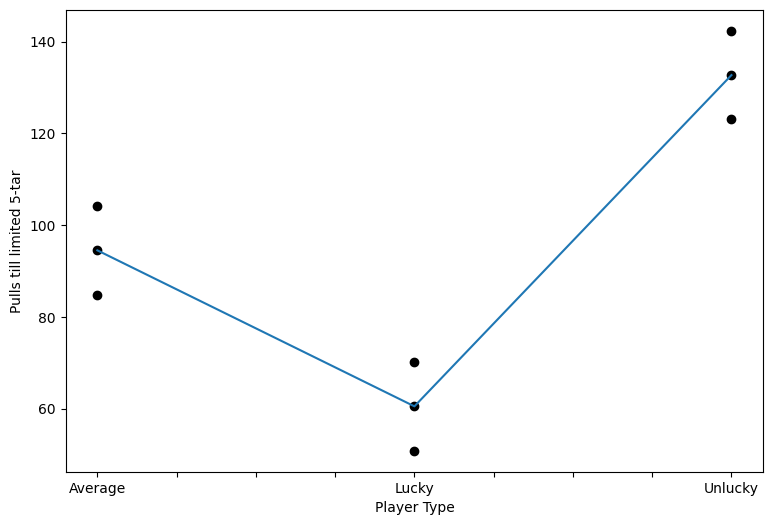

In [54]:
ax = df_mean.T.plot(ls='', marker = 'o', legend = False, c='black', figsize = (9,6),
                   xlabel = 'Player Type', ylabel = 'Pulls till limited 5-tar')
ax = df_mean.loc['mean'].plot()

### Effect Size

$$\eta^2 = \frac{\text{SSA}}{\text{SSA + SSE}} = \frac{\text{SSA}}{\text{SST}}$$

The larger the value of $\eta^2$ is, the stronger the relationship between the independent and dependent variables.

In [55]:
print(f'The Effect Size is {one_way_anova.rsquared: .4g}')

The Effect Size is  0.813


### Multiple Comparison

#### Tukey-Kramer HSD (Honestly Significant Difference)

In [56]:
from statsmodels.stats.multicomp import MultiComparison

In [59]:
mc = MultiComparison(genshin_gacha['Pulls_Till_Limited_5_Star'], groups = genshin_gacha['Player_Type'])
print(mc.tukeyhsd(alpha=0.5))

  Multiple Comparison of Means - Tukey HSD, FWER=0.50   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
Average   Lucky    -34.0 0.0001 -41.5844 -26.4156   True
Average Unlucky     38.2    0.0  30.6156  45.7844   True
  Lucky Unlucky     72.2    0.0  64.6156  79.7844   True
--------------------------------------------------------


## Two-way ANOVA

总平方和：$\text{SST}=\sum(y_{ij}-\bar{y})^2$

处理平方和/组间平方和: $\text{SSA}=$

# Regression Analysis

## Correlation

### Correlation Coefficient

Pearson's Correlation Coefficient:
$$
r = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2 \cdot \sum(y_i-\bar{y})^2}}
$$

Test of Correlation Coefficient:
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} \sim t(n-2)
$$

### Implementation

In [4]:
from scipy.stats import pearsonr

In [5]:
example_correlation = pd.read_csv('/Users/jianxiang/Research/Programming/Statistics/ultraman_vs_monster_data.csv')

In [7]:
corr, p_value = pearsonr(example_correlation['ultraman_power'], example_correlation['monster_strength'])
print(f"The correlation coefficient is {corr: .4g}, p-value is {p_value: .4g}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The correlation coefficient is  0.9602, p-value is  2.062e-11


## Uni-Variate (Simple) Linear Regression

### Uni-Variate Linear Regression Model and Equation

Uni-variate Linear Regression Model:
$$y = \beta_0 + \beta_1x + \epsilon$$

Estimated Regression Equation:
$$\hat{y}=\hat{\beta}_0 + \hat{\beta}_1x$$

## Multi-Variate Linear Regression

# Stochastic Process

## Markov Process

### Markov Chain

#### State-Transition Matrix

Assume that a system has $m$ states, then:

$$\boldsymbol{P}_{m\times m} = \begin{bmatrix}p_{11} & \cdots & p_{1m} \\ \vdots & \ddots &\vdots \\ p_{m1} & \cdots & p_{mm}\end{bmatrix}$$

$$p_{ij} = p(X_t = j|X_{t-1} = i)$$

$\forall i \in [1, m] \cap \mathbb{N}$:

$$\sum_{j=1}^mp_{ij} = 1$$

#### State Distribution

##### Initial State

$$\boldsymbol{\pi}_0 = \begin{bmatrix}\pi_1 & \pi_2 & \cdots & \pi_m\end{bmatrix}$$

where $\pi_i \geq 0\land \sum_{m}p_i = 1$

##### Any State

$$\boldsymbol{\pi}_t = \boldsymbol{\pi}_{t-1}\boldsymbol{P} = \boldsymbol{\pi}_0\boldsymbol{P}^t$$

### Reinforcement Learning

## Gaussian Process